<a href="https://colab.research.google.com/github/Ember1995/ml_models/blob/main/%D0%94%D0%9710_%D0%94%D1%83%D0%BD%D1%81%D1%8C%D0%BA%D0%B0_%D0%93%D0%B0%D0%BD%D0%BD%D0%B0_%D0%9C%D0%B8%D0%BA%D0%BE%D0%BB%D0%B0%D1%97%D0%B2%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Встановлюємо необхідні пакети і бібліотеки
!pip install plotly==5.20.0
!pip install "jupyterlab>=3" "ipywidgets>=7.6"


In [ ]:
# Імпортуємо необхідні бібліотеки
import os
import librosa
import zipfile
import zipfile
from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [ ]:
# Завантажуємо набори даних
url = "https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true"
zip_file_path = "WorldHappinessReport.zip"
download_path = "./WorldHappinessReport/"
if not os.path.exists(download_path):
    urlretrieve(url, zip_file_path)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(download_path)
    os.remove(zip_file_path)

# Завантаження даних
df_15 = pd.read_csv(os.path.join(download_path, "2015.csv"))
df_16 = pd.read_csv(os.path.join(download_path, "2016.csv"))
df_17 = pd.read_csv(os.path.join(download_path, "2017.csv"))
df_18 = pd.read_csv(os.path.join(download_path, "2018.csv"))
df_19 = pd.read_csv(os.path.join(download_path, "2019.csv"))

# Перевірка кількості рядків і стовпців
print("2015:", df_15.shape)
print("2016:", df_16.shape)
print("2017:", df_17.shape)
print("2018:", df_18.shape)
print("2019:", df_19.shape)

# Перевірка назв стовпців (признаків)
print("\nColumns in 2015:", df_15.columns)
print("\nColumns in 2016:", df_16.columns)
print("\nColumns in 2017:", df_17.columns)
print("\nColumns in 2018:", df_18.columns)
print("\nColumns in 2019:", df_19.columns)


2015: (158, 12)
2016: (157, 13)
2017: (155, 12)
2018: (156, 9)
2019: (156, 9)

Columns in 2015: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Columns in 2016: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

Columns in 2017: Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

C

In [ ]:
df_15.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df_18.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
# Додавання стовпця 'Year' до кожного датасету
df_15['Year'] = 2015
df_16['Year'] = 2016
df_17['Year'] = 2017
df_18['Year'] = 2018
df_19['Year'] = 2019

# Перейменування стовпців у 2018 та 2019 роках для відповідності з 2015-2017 роками
df_18 = df_18.rename(columns={
    'Overall rank': 'Happiness Rank',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family & Social support',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Trust (Government Corruption)'
})

df_19 = df_19.rename(columns={
    'Overall rank': 'Happiness Rank',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family & Social support',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Trust (Government Corruption)'
})

# Перейменування стовпців у 2017 році для відповідності з 2015-2016 роками
df_17 = df_17.rename(columns={
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Family': 'Family & Social support',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)'
})

# Перейменування стовпців у 2015-2016 роках для відповідності з 2017-2019 роками
df_15 = df_15.rename(columns={'Family': 'Family & Social support'})
df_16 = df_16.rename(columns={'Family': 'Family & Social support'})

# Вибір відповідних стовпців для об'єднання
columns_to_keep = [
    'Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)',
    'Family & Social support', 'Health (Life Expectancy)', 'Freedom',
    'Generosity', 'Trust (Government Corruption)', 'Year'
]

# Вибір потрібних стовпців для 2015-2017 років
df_15 = df_15[columns_to_keep]
df_16 = df_16[columns_to_keep]
df_17 = df_17[columns_to_keep]

# Вибір потрібних стовпців для 2018-2019 років
df_18 = df_18[columns_to_keep]
df_19 = df_19[columns_to_keep]

# Об'єднання датасетів
df = pd.concat([df_15, df_16, df_17, df_18, df_19], ignore_index=True)

# Виведення інфо датасету для перевірки
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 782 non-null    int64  
 1   Country                        782 non-null    object 
 2   Happiness Score                782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Family & Social support        782 non-null    float64
 5   Health (Life Expectancy)       782 non-null    float64
 6   Freedom                        782 non-null    float64
 7   Generosity                     782 non-null    float64
 8   Trust (Government Corruption)  781 non-null    float64
 9   Year                           782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [ ]:
df.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family & Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [ ]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family & Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125436,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105816,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054000,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091000,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.156030,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


Text(0.5, 1.02, 'Розподіл даних за всі роки')

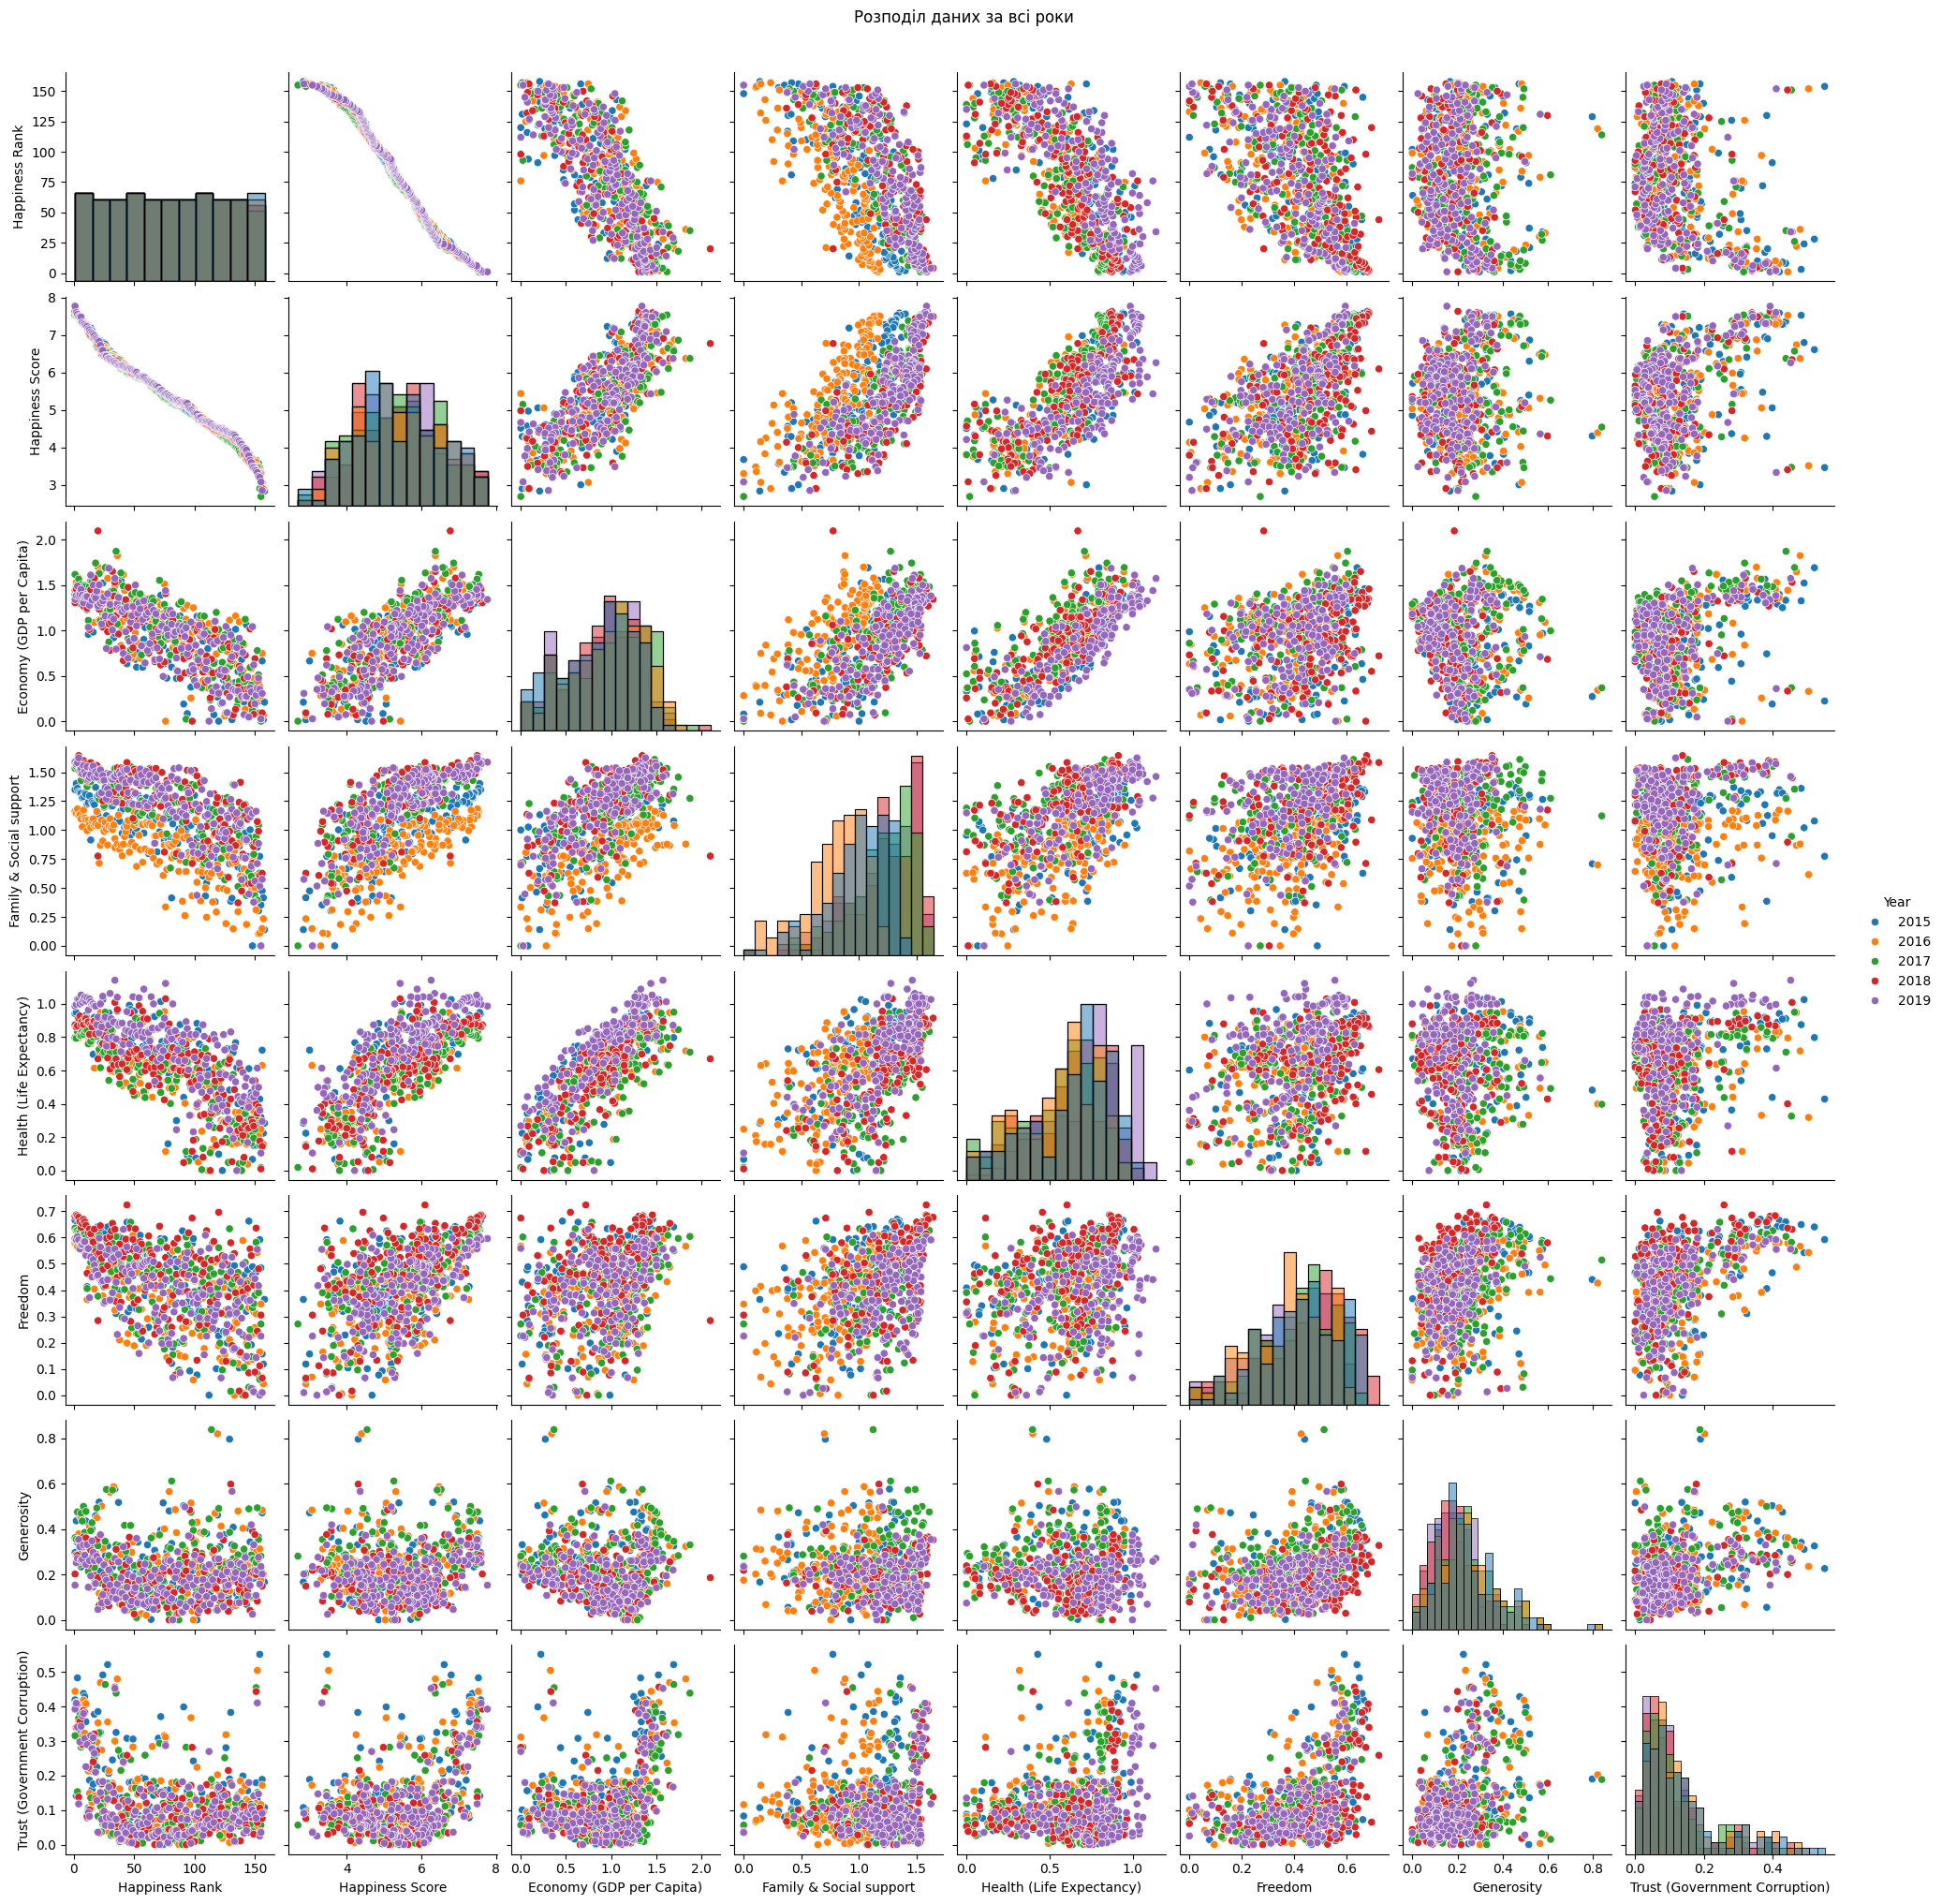

In [ ]:
sns.pairplot(df, hue='Year', palette= "tab10", diag_kind='hist')
plt.suptitle('Розподіл даних за всі роки', y=1.02)



*  Бачимо нормальний розподіл даних.
*  Бачимо позитивні кореляції між Happiness Score та Economy (GDP per Capita), Family & Social support, Health (Life Expectancy) та Freedom. Проаналізуємо надалі силу їх кореляції.
*  Спостерігаємо відсутність кореляції між Happiness Score та Generosity, Trust (Government Corruption). Їх надалі не включатимемо в кореляційний аналіз.

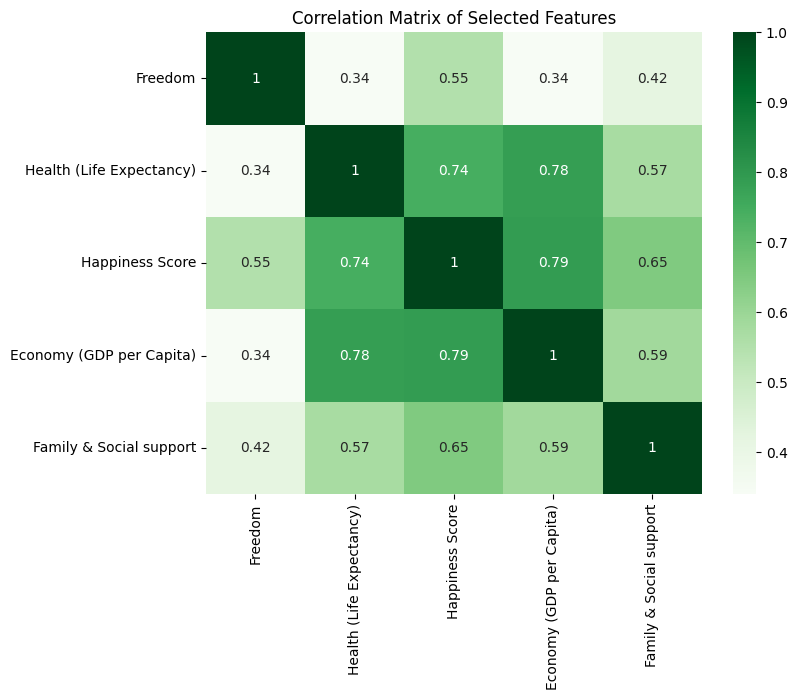

In [ ]:
# Вибираємо потрібні стовпці для кореляційного аналізу
selected_columns = [
    'Freedom',
    'Health (Life Expectancy)',
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family & Social support'
]

# Створюємо датафрейм тільки з обраними стовпцями
selected_df = df[selected_columns]

# Будуємо кореляційну матрицю та теплову карту
plt.figure(figsize=(8, 6))
sns.heatmap(selected_df.corr(), cmap='Greens', annot=True)
plt.title('Correlation Matrix of Selected Features')
plt.show()

Найбільшу кореляцію спостерігаємо між 'Happiness Score' та 'Economy (GDP per Capita)', а також 'Happiness Score' та 'Health (Life Expectancy)'. При цьому інші параметри також доволі сильно корелюють з 'Happiness Score' - кореляція вища за 0.5.

In [ ]:
# Обчислення середнього значення Happiness Score за 5 років для кожної країни
average_happiness = df.groupby('Country')['Happiness Score'].mean().reset_index()

# Створення теплової мапи з використанням plotly
fig = px.choropleth(average_happiness,
                    locations="Country",
                    color="Happiness Score",
                    locationmode="country names",
                    title="Average Happiness Score by Country (2015-2019)"
                   )
fig.show()

In [ ]:
# Функція для стандартизації даних
def data_scale(data, scaler_type='minmax'):
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'std':
        scaler = StandardScaler()
    elif scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res

# бчислюємо середні значення для кожної країни за всі роки
df_mean = df.groupby('Country').mean().reset_index()

# Вибираємо числові стовпці для стандартизації, крім 'Year' і 'Happiness Rank'
numeric_df_mean = df_mean.drop(columns=['Year', 'Happiness Rank'])

# Застосовуємо стандартизацію
data_scaled_mean = data_scale(numeric_df_mean.drop(columns=['Country']), scaler_type='std')  # Використання StandardScaler
df_scaled_mean = pd.DataFrame(data_scaled_mean, columns=numeric_df_mean.drop(columns=['Country']).columns)

# Виводимо кілька перших рядків масштабованого датафрейму
df_scaled_mean.head()


,Happiness Score,Economy (GDP per Capita),Family & Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,-1.704277,-1.355719,-2.389655,-1.466696,-2.064073,0.400004,-0.687174
1,-0.609393,0.062765,-1.148326,0.742033,-0.284794,-0.466733,-0.830352
2,0.262097,0.244077,-0.000154,0.233811,-1.640132,-1.323257,0.158906
3,-1.376259,-0.279350,-0.488652,-1.967318,-2.698034,-1.010311,-0.557612
4,0.984659,0.483302,0.923186,0.630970,0.483893,-1.122275,-0.627430


In [ ]:
# Виводимо статистики отриманого стандартизованого набору даних
df_scaled_mean.describe()


,Happiness Score,Economy (GDP per Capita),Family & Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
count,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02
mean,-3.186993e-16,-1.371452e-17,-1.149407e-16,3.422099e-16,-2.586167e-16,2.194323e-16,-4.179663e-17
std,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00
min,-2.100144e+00,-2.213008e+00,-3.863205e+00,-2.365445e+00,-2.698034e+00,-1.924146e+00,-1.229781e+00
25%,-8.343837e-01,-8.124321e-01,-4.880834e-01,-7.642906e-01,-6.300200e-01,-7.273311e-01,-6.708096e-01
50%,-4.205746e-02,1.799502e-01,1.163309e-01,2.362082e-01,1.384050e-01,-1.153143e-01,-3.078411e-01
75%,7.143142e-01,8.075495e-01,8.474244e-01,7.167381e-01,6.831171e-01,4.989202e-01,2.844768e-01
max,1.976241e+00,2.026523e+00,1.505239e+00,1.744132e+00,1.705473e+00,4.356801e+00,3.306207e+00




*   Стандартне відхилення (std) для кожної ознаки стало рівним або дуже близьким до одиниці. Це свідчить про те, що дані були масштабовані, щоб відповідати стандартному нормальному розподілу.
*   Після стандартизації мінімальні та максимальні значення ознак стали ближчими до стандартних діапазонів, характерних для нормалізованих даних (в діапазоні від -3 до +3 стандартних відхилень).
*   Стандартизація змінила масштаб даних і відцентрувала їх навколо нуля.





In [ ]:
# Додаємо назад стовпець 'Country'
df_scaled_mean['Country'] = df_mean['Country']

# Виключаємо текстові стовпці (наприклад, 'Country') перед кластеризацією
X = df_scaled_mean.drop(columns=['Country']).dropna()

# Визначаємо кількість кластерів
n_clusters = 3  # Ви можете вибрати інше значення залежно від задачі

# Створюємо модель GaussianMixture
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(X)

# Прогнозуємо кластери для кожного зразка
clusters = gmm.predict(X)

# Додаємо кластери до датафрейму
df_scaled_mean['Cluster'] = clusters

# Виводимо кілька рядків із датасету з новими кластерами
df_scaled_mean.head()


,Happiness Score,Economy (GDP per Capita),Family & Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Country,Cluster
0,-1.704277,-1.355719,-2.389655,-1.466696,-2.064073,0.400004,-0.687174,Afghanistan,0
1,-0.609393,0.062765,-1.148326,0.742033,-0.284794,-0.466733,-0.830352,Albania,1
2,0.262097,0.244077,-0.000154,0.233811,-1.640132,-1.323257,0.158906,Algeria,1
3,-1.376259,-0.279350,-0.488652,-1.967318,-2.698034,-1.010311,-0.557612,Angola,0
4,0.984659,0.483302,0.923186,0.630970,0.483893,-1.122275,-0.627430,Argentina,1


In [ ]:
# Створюємо теплову мапу для відображення розподілу країн за кластерами
fig = px.choropleth(df_scaled_mean,
                    locations="Country",  # Вказуємо стовпець з назвами країн
                    locationmode="country names",  # Режим розпізнавання країн
                    color="Cluster",  # Кластеризація буде показана за кольором
                    hover_name="Country",  # Назви країн будуть видні при наведенні курсора
                    title="Country Distribution by Clusters Based on Average High-Correlating Features (2015-2019)"
                   )

# Відображаємо мапу
fig.show()

Тепер проведемо експеримент на ознаках, які слабо або не корелюють з Hapiness Score.

In [ ]:
# Крок 1: Обчислення середніх значень для кожної країни за всі роки
df_mean = df.groupby('Country').mean().reset_index()

# Крок 2: Вибір ознак з низькою кореляцією ('Happiness Score', 'Generosity', 'Trust (Government Corruption)')
selected_features = ['Happiness Score', 'Generosity', 'Trust (Government Corruption)']
df_selected = df_mean[selected_features]

# Додаємо суфікс '_mean' до назв ознак, щоб позначити, що це середні значення
df_selected = df_selected.add_suffix('_mean')

# Крок 3: Стандартизація даних
data_scaled_selected = data_scale(df_selected, scaler_type='std')
df_scaled_selected = pd.DataFrame(data_scaled_selected, columns=df_selected.columns)

# Додаємо стовпець 'Country' для подальшої візуалізації
df_scaled_selected['Country'] = df_mean['Country']

# Крок 4: Кластеризація на основі обраних ознак
X_selected = df_scaled_selected.drop(columns=['Country']).dropna()
gmm_selected = GaussianMixture(n_components=3, random_state=42)
gmm_selected.fit(X_selected)
clusters_selected = gmm_selected.predict(X_selected)

# Додаємо результати кластеризації до датафрейму
df_scaled_selected['Cluster'] = clusters_selected

# Відображення кількох рядків з новими кластерами
df_scaled_selected.head()

# Крок 5: Створення теплової мапи для відображення розподілу країн за кластерами
fig = px.choropleth(df_scaled_selected,
                    locations="Country",  # Вказуємо стовпець з назвами країн
                    locationmode="country names",  # Режим розпізнавання країн
                    color="Cluster",  # Кластеризація буде показана за кольором
                    hover_name="Country",  # Назви країн будуть видні при наведенні курсора
                    title="Country Distribution by Clusters Based on Average Low-Correlating Features (2015-2019)"
                   )

# Відображення мапи
fig.show()

### **Висновки**

**Кластеризація на основі слабокорельованих ознак:**

Кластеризація на основі слабокорельованих ознак (таких як Generosity і Trust (Government Corruption)) дозволила більш чітко виділити різниці між країнами. Це може свідчити про те, що ці ознаки несуть у собі специфічну інформацію, яка більш чутлива до локальних варіацій в даних.

**Кластеризація на основі сильнокорельованих ознак:**

Використання сильно корельованих ознак (наприклад, Happiness Score і Economy (GDP per Capita)) призводить до більш рівномірного розподілу країн по регіонах. Це відображає загальну картину, де країни, які мають схожі економічні показники та рівень щастя, згруповані разом, незалежно від інших факторів.

**Загальний висновок**

Обидва підходи дали високу збіжність з оригінальним heatmap. Використання тих чи інших ознак може бути корисним у контексті конкретної задачі: якщо мета — знайти особливі або унікальні країни, то слабокорельовані ознаки можуть бути корисними; якщо ж шукаємо загальні регіональні тенденції, то краще працювати з сильно корельованими ознаками.